<a href="https://colab.research.google.com/github/KAVIESH/Project-Clustering/blob/main/Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving stars.csv to stars.csv


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import statistics
import random
import csv

df = pd.read_csv("stars.csv")
print(df.head())

fig = px.scatter(df , x = "Size" , y = "Light")
fig.show()

        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


[[ 5.88267711  1.32541075]
 [10.91282974  3.18321731]
 [ 0.28118987  0.62001076]
 [ 7.68262274  1.80457756]
 [11.03407102  3.39044009]
 [ 0.84988347  0.82656157]
 [ 6.47346749  0.99997187]
 [12.17993641  4.37695642]
 [ 0.18253329  0.24372793]
 [ 7.56820956  1.31053068]
 [12.69679005  2.03584376]
 [ 0.02770377  0.64390611]
 [ 5.20021714  1.90392855]
 [14.84844867  9.20677086]
 [ 0.25906822  0.78305536]
 [ 6.1243438   1.1005551 ]
 [10.06301215  6.8423572 ]
 [ 0.50675639  0.74370214]
 [ 6.28221831  0.16934718]
 [14.025183    7.43555359]
 [ 0.05434116  0.19156329]
 [ 6.27626654  0.33758452]
 [10.31157448  9.41636235]
 [ 0.99958727  0.29189379]
 [ 5.22916552  0.02493252]
 [12.77452289  3.35990116]
 [ 0.99287173  0.27721941]
 [ 6.78203126  0.23741951]
 [12.73355738  4.98628931]
 [ 0.14092131  0.44453679]
 [ 5.08774426  0.3371882 ]
 [14.78157283  3.02636823]
 [ 0.20758125  0.40063895]
 [ 5.77421644  1.01817787]
 [14.42188085  5.06561331]
 [ 0.61217792  0.754544  ]
 [ 7.84657616  0.81794734]
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



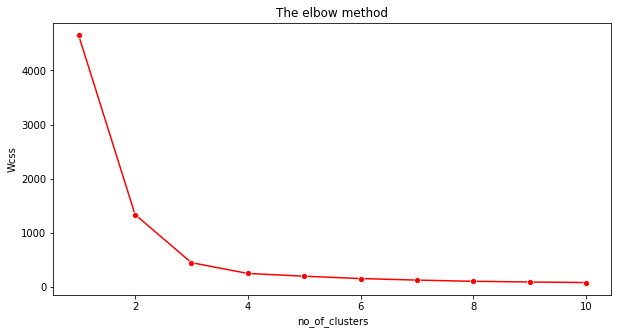

In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:,[0,1]].values
print(X)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The elbow method')
plt.xlabel("no_of_clusters")
plt.ylabel("Wcss")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

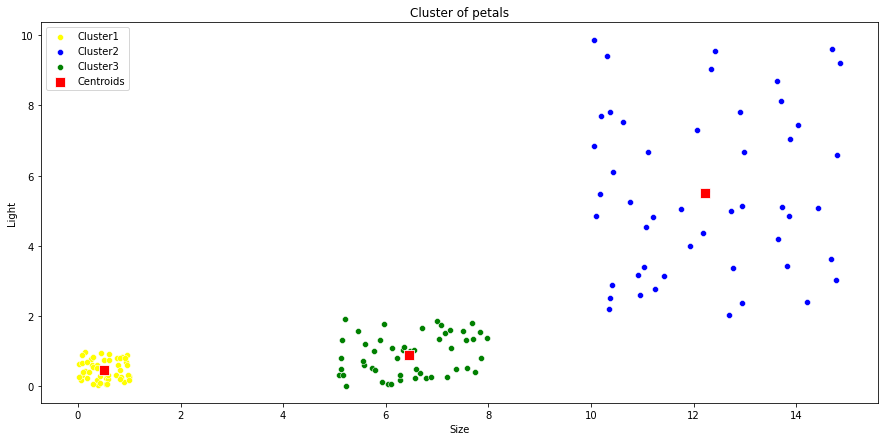

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3,init= 'k-means++',random_state=42)
y_means = kmeans.fit_predict(X)

plt.figure(figsize = (15,7))
sns.scatterplot(X[y_means == 0 , 0],X[y_means == 0,1 ] , color = 'yellow' , label = 'Cluster1')
sns.scatterplot(X[y_means == 1 , 0],X[y_means == 1,1 ] , color = 'blue' , label = 'Cluster2')
sns.scatterplot(X[y_means == 2 , 0],X[y_means == 2,1 ] , color = 'green' , label = 'Cluster3')
sns.scatterplot(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , color = 'red' , label = 'Centroids' , s = 100, marker = ',')
plt.grid(False)
plt.title("Cluster of petals")
plt.xlabel("Size")
plt.ylabel("Light")
plt.legend()
plt.show()